# Objective of this Notebook
<a id='objective-of-this-notebook'></a>
The goal is to model wine quality based on physicochemical tests, and to predict the quality (score between 0 and 10) of the wine.
The dataset is related to red and white vinho verde wine samples, from the north of Portugal. 

# Table of contents
<a id='toc'></a>


- [Objective of this Notebook](#objective-of-this-notebook)
- [Table of contents](#toc)
  * [1. Quick Data Exploration](#1-quick-data-exploration)
    + [Reading data](#reading-data)
    + [Features type](#features-type)
    + [Missing values](#missing-values)
    + [Pearson correlation between features](#pearson-correlation-between-features)
  * [2. Data preprocessing](#2-data-preprocessing)
    + [Scaling data](#scaling-data)
  * [3. Splitting data into Train and Test sets](#3-splitting-data-into-train-and-test-sets)
  * [4. Linear Modelisation](#4-linear-modelisation)
    + [Training, test and learning curves](#training--test-and-learning-curves)
    + [Results interpretation](#results-interpretation)
      - [Training error](#training-error)
      - [Test error](#test-error)
      - [Diagnosing Bias vs Variance](#diagnosing-bias-vs-variance)
  * [5. Polynomial features](#5-polynomial-features)
    + [Polynomial regression training and test](#polynomial-regression-training-and-test)
    + [Learning curve for the polynomial model](#learning-curve-for-the-polynomial-model)
    + [Results interpretations](#results-interpretations)
      - [Training and test error](#training-and-test-error)
      - [Models comparison](#model-comparisons)
  * [6. Conclusion](#6-conclusion)
    + [Bias-Variance Trade-Off](#bias-variance-trade-off)


## 1. Quick Data Exploration
<a id='1-quick-data-exploration'></a>

### Reading data
<a id='reading-data'></a>

In [170]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [171]:
red_wine_data = pd.read_csv("winequality-red.csv")

red_wine_data.info()
print('\n')
red_wine_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB




fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

### Features type
<a id='features-type'></a>

In [172]:
red_wine_data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

The first thing to note is that the features have the 'float64' type, **thus we can think about using a regression model to predict the wine quality value..**

### Missing values
<a id='missing-values'></a>

In [173]:
red_wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No missing values.

0       0.0
1       0.0
2       0.0
3      10.0
4      53.0
5     681.0
6     638.0
7     199.0
8      18.0
9       0.0
10      0.0
Name: quality, dtype: float64 




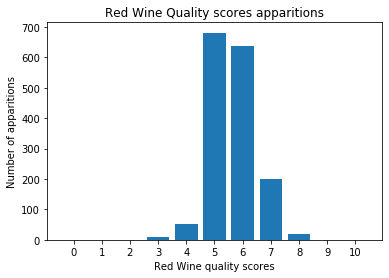

In [174]:
classes_proportions = red_wine_data['quality'].value_counts()
classes_proportions = classes_proportions.reindex(np.arange(0, 11)).fillna(0)
print(classes_proportions,'\n\n')

plt.bar(classes_proportions.keys(),classes_proportions.values)
plt.xticks(classes_proportions.keys())
plt.xlabel('Red Wine quality scores')
plt.ylabel('Number of apparitions')
plt.title('Red Wine Quality scores apparitions')
plt.show()

We can see that we are working with an imbalanced dataset because wines with a quality score of 5 and 6 are ubiquitous compared to other classes of wines.
Wines with a 0, 1, 2, 9 or 10 quality score are non-existent in the dataset.

### Pearson correlation between features
<a id='pearson-correlation-between-features'></a>
Pearsonâ€™s correlation coefficient is a statistical test which measures the statistical relationship, or association, between two continuous variables.  It is known as the best method of measuring the association between variables of interest because it is based on the method of covariance.  It gives information about the magnitude of the association, or correlation, as well as the direction of the relationship.

A Pearson correlation is a number between -1 and 1.
Features highly correlated (close to 1 or -1) with our target 'quality' will be helpful for the predictions of the latter.
If a feature has a correlation value close to 0, we can assume that they will be less useful regarding predictions of our target.

In [175]:
import seaborn as sns

correlations = red_wine_data.corr()['quality'].drop('quality').sort_values(ascending=False)
print(correlations,'\n\n')

alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64 




We can print corellations between all the features on a heatmap to see if there are features related to each other.

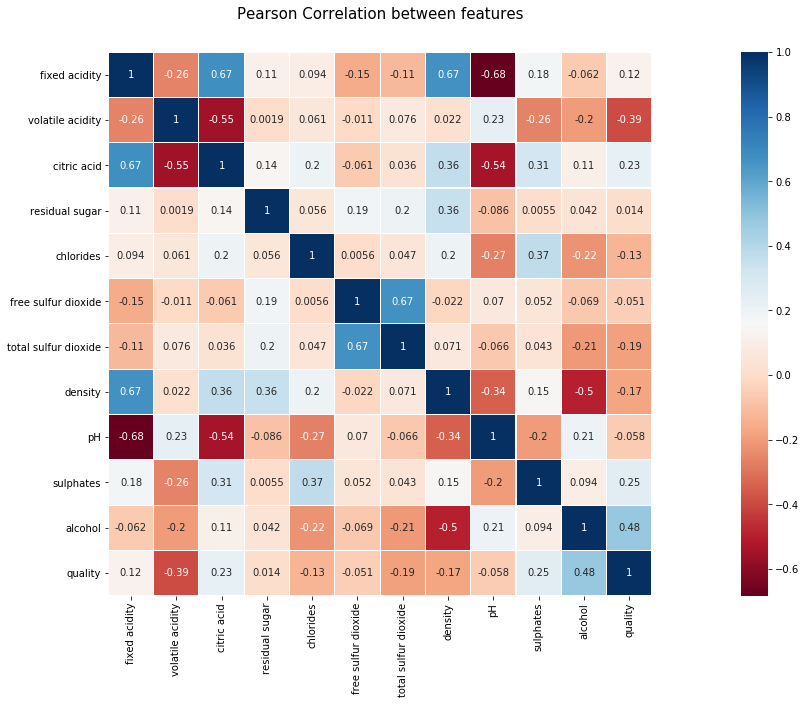

In [176]:
colormap = plt.cm.RdBu
plt.figure(figsize=(32,10))
plt.title('Pearson Correlation between features', y=1.05, size=15)
sns.heatmap(red_wine_data.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

## 2. Data preprocessing
<a id='2-data-preprocessing'></a>


### Scaling data 
<a id='scaling-data'></a>

Our linear model uses Gradient Descent to minimize a cost function.
We can speed up gradient descent by having each of our input values in roughly the same range.
Two techniques to help with this are feature scaling and mean normalization. 

* Feature scaling involves dividing the input values by the range (i.e. the maximum value minus the minimum value) of the input variable, resulting in a new range of just 1. 

* Mean normalization involves subtracting the average value for an input variable from the values for that input variable resulting in a new average value for the input variable of just zero. 

-> To implement both of these techniques, we can adjust our input values as shown in this formula:
$Z = \frac{x - \mu}{\sigma}$ where x is the feature value, $\mu$ is the average of all the values for the feature concerned and $\sigma$ is the standard deviation (or the range value : max-min)


Here the features are transformed so that they have the properties of a standard normal distribution  with mean = 0 and standard deviation = 1.
This will speed up calcultations of algorithms using Gradient Descent and measures of distance (like Euclidean distance).

In [177]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#Features column names without the target 'quality' 
features_columns_names = red_wine_data.columns[:-1]
scaled_data = scaler.fit_transform(red_wine_data[features_columns_names])

#Replacing features old values with their scaled values
red_wine_data.loc[:, features_columns_names] = scaled_data

## 3. Splitting data into Train and Test sets
<a id='3-splitting-data-into-train-and-test-sets'></a>

In [178]:
from sklearn.model_selection import train_test_split 

red_wine_qualities = red_wine_data['quality']
red_wine_features = red_wine_data.drop(columns=['quality'])

# Training set : 70% & Test set : 30%
X_train, X_test, y_train, y_test = train_test_split(red_wine_features, red_wine_qualities, test_size=0.30, random_state=42, shuffle=True, 
                                                    stratify=red_wine_qualities)

## 4. Linear Modelisation 
<a id='4-linear-modelisation'></a>
### Training, test and learning curves
<a id='training--test-and-learning-curves'></a>

For the training part, we have differents training set sizes: 
 1. We fit a linear model to the training set (with respect to its training set size)
 3. We compute the quality predictions for the training set examples and store the MSE in a list of mse values for the training set.
 4. We test our linear model on the test set and store the MSE value in a second list of mse values for the test set.
 5. We increase the training set size and go back to the second step.
 

In [179]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

  
#To split the training set in 50 parts of same size
instance_sizes = np.linspace(0.01, 1.0, 50)
train_sizes = [int(i*X_train.shape[0]) for i in instance_sizes]

mse_training_values = []
mse_test_values = []

for i in range(len(instance_sizes)):
    linear_model = LinearRegression()
        
    #Training part
    training_predictors = X_train.iloc[:train_sizes[i]]
    training_outputs = y_train.iloc[:train_sizes[i]]
    
    linear_model = linear_model.fit(training_predictors , training_outputs)
    
    #Adding the MSE of the predictions regarding the training samples
    training_predictions = linear_model.predict(training_predictors)
    mse_training_values.append(mean_squared_error(training_outputs, training_predictions))
        
        
    #Test part
    test_predictions = linear_model.predict(X_test)
    mse_test_values.append(mean_squared_error(y_test, test_predictions))
        
    



Let's plot the error evolutions during training and testing. 

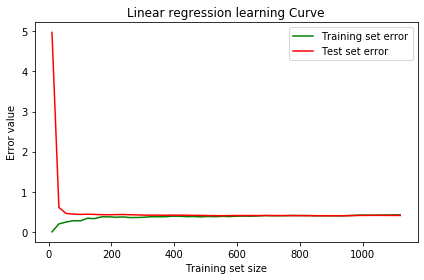

In [180]:

plt.plot(train_sizes,mse_training_values, color="green", label="Training set error")
plt.plot(train_sizes,mse_test_values, color="red",  label="Test set error")


# Create plot
plt.title("Linear regression learning Curve")
plt.xlabel("Training set size"), plt.ylabel("Error value"), plt.legend(loc="best")
plt.tight_layout()
plt.show()


### Results interpretation
<a id='results-interpretation'></a>


#### Training error
<a id='training-error'></a>


The training set error grows as the training set size grows. 
Why ? because when the number of samples is small it is quite easy to fit the data correctly therefore the error value will be small. However, when the training set size increase it's harder to fit all the data perfectly, thus the training set error becomes larger until we reach a constant value.

#### Test error
<a id='test-error'></a>

For the test set error, the value starts high and is decreasing because when we do not have sufficient training examples, the hypothesis can't generalize well to new examples of the test set but when we increase the training set size the hypothesis is getting better at generalizing new examples thus the error on the test set decreases.

#### Diagnosing Bias vs Variance
<a id='diagnosing-bias-vs-variance'></a>


Finally, training and test error seem to converge and to be close to each other. When we use the training set entirely, there is a **low variance** between both errors thus **we can conclude that the linear model did not overfit the training set.** 

You can see a general trend in the examples above:
* Linear machine learning algorithms often have a high bias but a low variance. (just like our model)
* Nonlinear machine learning algorithms often have a low bias but a high variance.

Thus, the linear model has some bias and we can try to reduce this bias by :
* Adding new features :
    - Decomposition : Use an available feature to create several less complex features easier to understand than the available feature for the linear model.
    - Aggregation : Use several available features to create one new feature which will have a bigger impact and give more informations to our model.
    - We can also add **polynomial features** created from available features. (this is risky and I wil explain why in the Bias-Variance Trade-Off part)




## 5. Polynomial features 
<a id='5-polynomial-features'></a>

Let's add some polynomial features to see if the error will decrease. Here, we will try different degree values to choose the best degree i.e the degree giving the lowest mean squared error on the validation set.


In [181]:
from sklearn.preprocessing import PolynomialFeatures

#split the dataset into train (60%), validation (20%), test sets (20%)
train_features, validation_features, test_features = np.split(red_wine_features.sample(frac=1), [int(.6*len(red_wine_features)), int(.8*len(red_wine_features))])
train_qualities, validation_qualities, test_qualities = np.split(red_wine_qualities.sample(frac=1), [int(.6*len(red_wine_qualities)), int(.8*len(red_wine_qualities))])

#we will store one linear model for each degree
poly_models = []
degrees = [2,3,4,5,6,7,8]
validation_mse_values = []
for degree in degrees :
    poly = PolynomialFeatures(degree)
    polynomial_train_features = poly.fit_transform(train_features)
    scaled_polynomial_features = scaler.fit_transform(polynomial_train_features)
    poly_model = LinearRegression()
    poly_model = poly_model.fit(scaled_polynomial_features,train_qualities)
    
    polynomial_validation_features = poly.fit_transform(validation_features)
    scaled_polynomial_validation_features = scaler.fit_transform(polynomial_validation_features)
    
    validation_set_predictions = poly_model.predict(scaled_polynomial_validation_features)
    validation_mse_values.append(mean_squared_error(validation_qualities, validation_set_predictions))
    
    poly_models.append(poly_model)
    
#the best degree is the degree which gave the lowest mean squared error value
best_degree_index = validation_mse_values.index(min(validation_mse_values))
best_degree = degrees[best_degree_index]
best_poly_model = poly_models[best_degree_index]


print('The best degree value for our polynomial is d=',best_degree)
    
    


The best degree value for our polynomial is d= 2


### Polynomial regression training and test
<a id='polynomial-regression-training-and-test'></a>
We can now, train our linear model with the best degree and see if the new model outworks our previous model.
We will also plot its learning curve to spot differences between them.

In [182]:

poly = PolynomialFeatures(best_degree)
polynomial_train_features = poly.fit_transform(X_train)
scaled_train_polynomial_features = scaler.fit_transform(polynomial_train_features)

polynomial_test_features = poly.fit_transform(X_test)
scaled_test_polynomial_features = scaler.fit_transform(polynomial_test_features)

poly_train_mse_values = []
poly_test_mse_values = []

for i in range(len(instance_sizes)):
    poly_model = best_poly_model
        
    #Training part
    training_predictors = scaled_train_polynomial_features[:train_sizes[i]]
    training_outputs = y_train.iloc[:train_sizes[i]]
    
    poly_model = poly_model.fit(training_predictors , training_outputs)
    
    #Adding the MSE of the predictions regarding the training samples
    training_predictions = poly_model.predict(training_predictors)
    poly_train_mse_values.append(mean_squared_error(training_outputs, training_predictions))
        
        
    #Test part
    test_predictions = poly_model.predict(scaled_test_polynomial_features)
    poly_test_mse_values.append(mean_squared_error(y_test, test_predictions))
    
    
    

### Learning curve for the polynomial model
<a id='learning-curve-for-the-polynomial-model'></a>

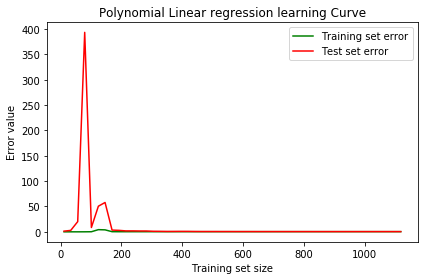

In [183]:
plt.plot(train_sizes,poly_train_mse_values, color="green", label="Training set error")
plt.plot(train_sizes,poly_test_mse_values, color="red",  label="Test set error")


# Create plot
plt.title("Polynomial Linear regression learning Curve")
plt.xlabel("Training set size"), plt.ylabel("Error value"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

### Results interpretations
<a id='results-interpretations'></a>


#### Training and test error
<a id='training-and-test-error'></a>

Here the training set mse values is not really increasing for our polynomial model. The mse values for the training set are constant and low compared to the mse values of the test set. Thus, we can conclude that our model is probably overfitting our training set and struggles to generalize on new examples coming from the test set. This is also why we can see a high variance between the training set error and the test set error.

We can see the difference by computing and comparing the means of the mse values for the training and the test set for both models (our first linear model and the polynomial model).

#### Models comparison
<a id='model-comparisons'></a>

In [184]:
import statistics
print("Linear model : Mean of MSE values for the training set:",statistics.mean(mse_training_values), ' and the test set: ',statistics.mean(mse_test_values))
print("Polynomial Model : Mean of MSE values for the training set:",statistics.mean(poly_train_mse_values), ' and the test set: ',statistics.mean(poly_test_mse_values))

Linear model : Mean of MSE values for the training set: 0.37054993796061475  and the test set:  0.5088831058542874
Polynomial Model : Mean of MSE values for the training set: 0.4347484499079341  and the test set:  11.362688642218796


**The polynomial model has a higher variance compared to the linear model.
The difference of errors between training and test set is much higher on the polynomial model (thus the variance is higher)**

## 6. Conclusion
<a id='6-conclusion'></a>

Sometimes trying to reduce bias for our model will increase its variance...


The goal of any supervised machine learning algorithm is to achieve low bias and low variance (top left in the figure 1). In turn the algorithm should achieve good prediction performance.

<img src="bvtarget.png" />


The parameterization of machine learning algorithms is often a battle to balance out bias and variance.

### Bias-Variance Trade-Off
<a id='bias-variance-trade-off'></a>

At its root, dealing with bias and variance is really about dealing with over- and under-fitting. Bias is reduced and variance is increased in relation to model complexity. As more and more parameters are added to a model, the complexity of the model rises and variance becomes our primary concern while bias steadily falls. For example, as more polynomial terms are added to a linear regression, the greater the resulting model's complexity will be.

Understanding bias and variance is critical for understanding the behavior of prediction models, but in general what you really care about is overall error, not the specific decomposition.
The sweet spot for any model is the level of complexity at which the increase in bias is equivalent to the reduction in variance.


<img src="bvtradeoff.png" />
